In [59]:
import pandas as pd
import numpy as np


def topsis(data, weight=None):
    """

    TOPSIS algorithm

    Args:
        data: Features
        weight:

    Returns:
        Result:
        Z:
        weight:

    """
    # normalized
    data = data / np.sqrt((data ** 2).sum())
    # best and worst solution
    Z = pd.DataFrame([data.min(), data.max()], index=['负理想解', '正理想解'])

    Result = data.copy()
    Result['正理想解'] = np.sqrt(((data - Z.loc['正理想解']) ** 2 * weight).sum(axis=1))
    Result['负理想解'] = np.sqrt(((data - Z.loc['负理想解']) ** 2 * weight).sum(axis=1))

    # composite score index
    Result['综合得分指数'] = Result['负理想解'] / (Result['负理想解'] + Result['正理想解'])
    Result['排序'] = Result.rank(ascending=False)['综合得分指数']

    return Result, Z, weight


weight = [0.01499,
          0.01371,
          0.42419,
          0.01306,
          0.00821,
          0.01341,
          0.00913,
          0.4914,
          0.01189]
data = pd.read_excel(
    r"E:\Programing\PycharmProjects\2022MCM-B\Q2\处理数据\第二问制定的政策.xlsx")  #The path and the name of the file
# data = pd.read_excel(
#     r"E:\Programing\PycharmProjects\2022MCM-B\Q2\处理数据\政策(1).xlsx")  #The path and the name of the file

data = data.set_index('政策')
Result, Z, weight = topsis(data, weight)
res = Result.iloc[:, -4:-1]
Result

,人口密度（人/平方千米）,耕地面积,森林面积,大象致人伤亡数量,食草动物致人伤亡数量,食肉动物致人伤亡数量,营地累计数量和住宿（MMNR内部以及周边地区）,犀牛栖息地百分比,牛放牧扩大占比,正理想解,负理想解,综合得分指数,排序
政策,,,,,,,,,,,,,
1,0.204057,0.199724,0.182883,0.209083,0.2,0.204058,0.198564,0.185883,0.000000,0.119934,0.040205,0.251064,22.0
2,0.204057,0.199724,0.182883,0.209083,0.2,0.204058,0.198564,0.185883,0.060759,0.118868,0.040748,0.255285,21.0
3,0.204057,0.199724,0.182883,0.209083,0.2,0.204058,0.198564,0.185883,0.121518,0.118165,0.042333,0.263759,18.0
4,0.204057,0.199724,0.182883,0.209083,0.2,0.204058,0.198564,0.206537,0.206581,0.107569,0.048306,0.309904,6.0
5,0.204057,0.199724,0.182883,0.209083,0.2,0.204058,0.198564,0.258171,0.206581,0.087411,0.068496,0.439339,4.0
6,0.204057,0.199724,0.182883,0.209083,0.2,0.204058,0.198564,0.309806,0.206581,0.079565,0.098337,0.552760,1.0
7,0.204057,0.199724,0.182883,0.209083,0.2,0.204058,0.129498,0.185883,0.206581,0.118077,0.045611,0.278644,12.0
8,0.204057,0.199724,0.182883,0.209083,0.2,0.204058,0.172664,0.185883,0.206581,0.117861,0.045797,0.279833,10.0
9,0.204057,0.199724,0.182883,0.209083,0.2,0.204058,0.215830,0.185883,0.206581,0.117788,0.046351,0.282386,8.0


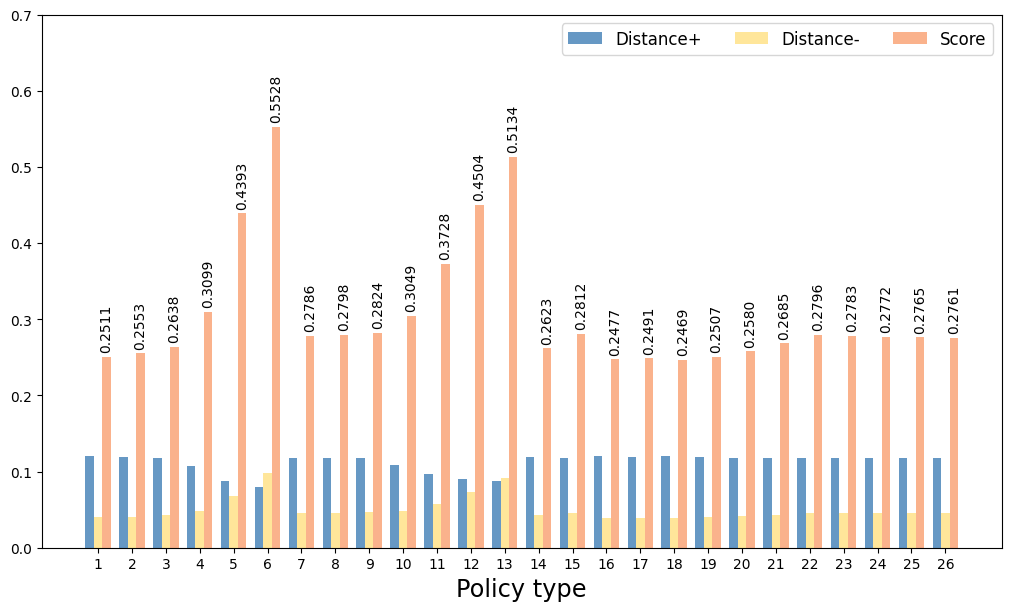

In [60]:
import matplotlib.pyplot as plt
import numpy as np

species = res.index.to_list()
penguin_means = {
    'Distance+': res['正理想解'].to_list(),
    'Distance-': res['负理想解'].to_list(),
    'Score': res['综合得分指数'].to_list(),
}

x = np.arange(len(species))  # the label locations
width = 0.25  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(constrained_layout=True, figsize=(10, 6))

# Distance+
offset = width * multiplier
rects = ax.bar(x + offset, list(penguin_means.items())[multiplier][1], width,
               label=list(penguin_means.items())[multiplier][0], color='#6698c4')
multiplier += 1

# Distance-
offset = width * multiplier
rects = ax.bar(x + offset, list(penguin_means.items())[multiplier][1], width,
               label=list(penguin_means.items())[multiplier][0], color='#ffe69a')
multiplier += 1

# Score
offset = width * multiplier
rects = ax.bar(x + offset, list(penguin_means.items())[multiplier][1], width,
               label=list(penguin_means.items())[multiplier][0], color='#fab28c')
ax.bar_label(rects, padding=3, fmt='%.4f', rotation=90)
multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xticks(x + width, species)
ax.legend(loc='upper right', ncols=3, fontsize='large')
ax.set_ylim(0, 0.7)
ax.set_xlabel('Policy type', fontsize='xx-large')

plt.savefig('topsis.svg')
plt.show()

# 第二问结论

对于A区域：
根据18-26政策可知，应该择优选择政策22，人口密度应该限制到60

---

对于B区域：
根据4-17政策可知，应该择优选择政策6，犀牛栖息地百分比应该提高至30%

---

对于C区域：
根据1-3政策，应该择优选择政策3，牛放牧扩大占比应该限制在10%
